# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_response = requests.get(city_url + city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response['coord']["lat"]
        city_lng = city_response['coord']["lon"]
        city_max_temp = city_response["main"]["temp_max"]
        city_humidity = city_response["main"]["humidity"]
        city_clouds = city_response["clouds"]["all"]
        city_wind = city_response["wind"]["speed"]
        city_country = city_response["sys"]["country"]
        city_date = city_response["dt"]             
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | invercargill
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | brookings
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | inebolu
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | kazalinsk
City not found. Skipping...
Processing Record 17 of Set 1 | waddan
Processing Record 18 of Set 1 | padangsidempuan
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | dampit
Processing 

Processing Record 41 of Set 4 | koz'modem'yansk
Processing Record 42 of Set 4 | broome
Processing Record 43 of Set 4 | weno
Processing Record 44 of Set 4 | taltal
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | novyy turtkul'
Processing Record 47 of Set 4 | el nido
Processing Record 48 of Set 4 | minas de marcona
Processing Record 49 of Set 4 | qarazhal
Processing Record 0 of Set 5 | tyukhtet
Processing Record 1 of Set 5 | aweil
Processing Record 2 of Set 5 | kapa'a
Processing Record 3 of Set 5 | dudinka
Processing Record 4 of Set 5 | bucerias
Processing Record 5 of Set 5 | mili
Processing Record 6 of Set 5 | hengchun
Processing Record 7 of Set 5 | kyren
Processing Record 8 of Set 5 | susuman
Processing Record 9 of Set 5 | flying fish cove
Processing Record 10 of Set 5 | am djarass
City not found. Skipping...
Processing Record 11 of Set 5 | la peca
Processing Record 12 of Set 5 | najaf
Processing Record 13 of Set 5 | prince rupert
Processing Record 14 of Set 

Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | mogadishu
Processing Record 35 of Set 8 | sharm el-sheikh
Processing Record 36 of Set 8 | venev
Processing Record 37 of Set 8 | hirara
Processing Record 38 of Set 8 | port macquarie
Processing Record 39 of Set 8 | kabare
Processing Record 40 of Set 8 | braslaw
Processing Record 41 of Set 8 | carbonear
Processing Record 42 of Set 8 | twin rivers
Processing Record 43 of Set 8 | as sulayyil
Processing Record 44 of Set 8 | vyksa
Processing Record 45 of Set 8 | jaynagar-majilpur
Processing Record 46 of Set 8 | saint-philippe
Processing Record 47 of Set 8 | novodvinsk
Processing Record 48 of Set 8 | callao
Processing Record 49 of Set 8 | tonghae
Processing Record 0 of Set 9 | laojunmiao
Processing Record 1 of Set 9 | markala
Processing Record 2 of Set 9 | recreo
Processing Record 3 of Set 9 | nar'yan-mar
Processing Record 4 of Set 9 | gereida
Processing Record 5 of Set 9 | port augusta
Processing Record 6 of Set 9 | ya

Processing Record 22 of Set 12 | biltine
Processing Record 23 of Set 12 | sierra vista southeast
Processing Record 24 of Set 12 | cooper's town
Processing Record 25 of Set 12 | kievka
Processing Record 26 of Set 12 | usinsk
Processing Record 27 of Set 12 | calingasta
Processing Record 28 of Set 12 | pudozh
Processing Record 29 of Set 12 | rio gallegos
Processing Record 30 of Set 12 | binji
Processing Record 31 of Set 12 | pont-rouge
Processing Record 32 of Set 12 | turkmenabat
Processing Record 33 of Set 12 | nyurba
Processing Record 34 of Set 12 | yamada
Processing Record 35 of Set 12 | tavda
Processing Record 36 of Set 12 | phatthalung
Processing Record 37 of Set 12 | zhangjiakou
Processing Record 38 of Set 12 | christchurch
Processing Record 39 of Set 12 | ciudad de armeria
Processing Record 40 of Set 12 | saint-pierre
Processing Record 41 of Set 12 | pokachi
Processing Record 42 of Set 12 | lubao
Processing Record 43 of Set 12 | makoua
Processing Record 44 of Set 12 | le lavandou
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,11.39,89,100,1.92,NZ,1699815329
1,grytviken,-54.2811,-36.5092,5.46,81,100,2.51,GS,1699815329
2,albany,42.6001,-73.9662,6.00,55,10,1.34,US,1699815207
3,invercargill,-46.4000,168.3500,11.68,95,99,2.68,NZ,1699815329
4,port alfred,-33.5906,26.8910,13.99,85,6,0.89,ZA,1699815329


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.39,89,100,1.92,NZ,1699815329
1,grytviken,-54.2811,-36.5092,5.46,81,100,2.51,GS,1699815329
2,albany,42.6001,-73.9662,6.00,55,10,1.34,US,1699815207
3,invercargill,-46.4000,168.3500,11.68,95,99,2.68,NZ,1699815329
4,port alfred,-33.5906,26.8910,13.99,85,6,0.89,ZA,1699815329


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

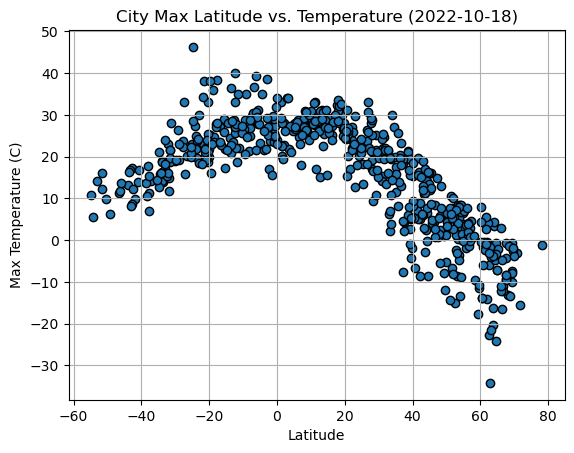

In [8]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

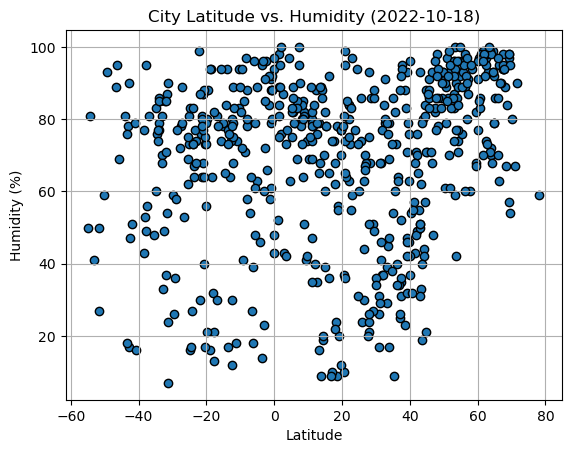

In [9]:
# Build the scatter plots for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

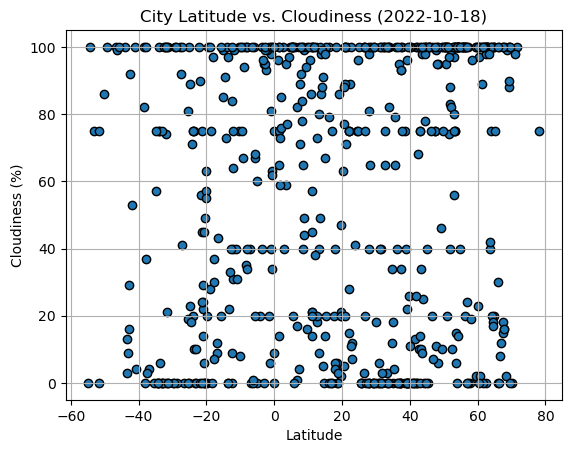

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

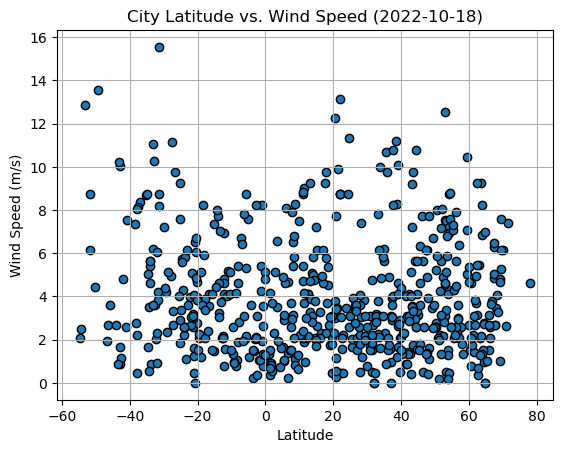

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y, edgecolors='black', linewidths=1, label='Data Points')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True, axis='x')
plt.grid(True, axis='y')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def Regress_scat_Plot(dataframe, xCol, yCol, xLabel, yLabel):
    x = dataframe[xCol]
    y = dataframe[yCol]

    correlation_coefficient, _ = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    regress_values = x * slope + intercept
    print(f"The rvalue is: {rvalue}")
    formula_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(min(x), max(y), formula_text, color='red', fontsize=16)

    plt.plot(x, slope * x + intercept, color='red', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
    plt.scatter(x, y)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

    plt.show()

The rvalue is: -0.6422267018039918


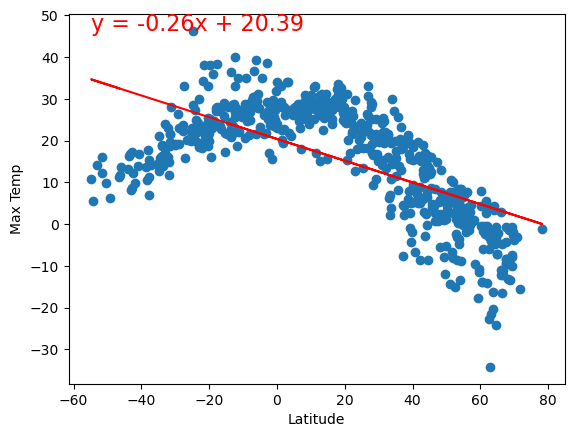

In [13]:
Regress_scat_Plot(city_data_df,'Lat','Max Temp', 'Latitude', "Max Temp")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.copy()
northern_hemi_df = northern_hemi_df.loc[northern_hemi_df['Lat'] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,6.00,55,10,1.34,US,1699815207
5,brookings,44.3114,-96.7984,14.14,44,0,10.80,US,1699815330
8,bilibino,68.0546,166.4372,-13.18,89,100,3.47,RU,1699815330
9,inebolu,41.9747,33.7608,16.41,71,100,1.41,TR,1699815331
10,college,64.8569,-147.8028,-7.03,79,100,0.00,US,1699815331


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.copy()
southern_hemi_df = southern_hemi_df.loc[southern_hemi_df['Lat'] <= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,11.39,89,100,1.92,NZ,1699815329
1,grytviken,-54.2811,-36.5092,5.46,81,100,2.51,GS,1699815329
3,invercargill,-46.4000,168.3500,11.68,95,99,2.68,NZ,1699815329
4,port alfred,-33.5906,26.8910,13.99,85,6,0.89,ZA,1699815329
6,isangel,-19.5500,169.2667,16.06,88,100,2.06,VU,1699815330


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8729175176199052


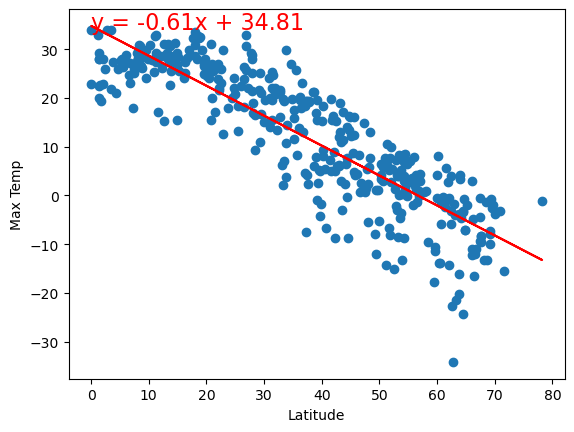

In [16]:
# Linear regression on Northern Hemisphere
Regress_scat_Plot(northern_hemi_df, 'Lat', 'Max Temp', 'Latitude','Max Temp')

The rvalue is: 0.6791486800470024


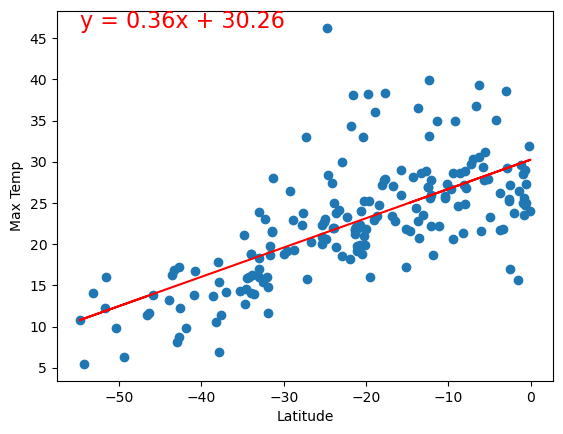

In [17]:
# Linear regression on Southern Hemisphere
Regress_scat_Plot(southern_hemi_df, 'Lat', 'Max Temp','Latitude', 'Max Temp')

**Discussion about the linear relationship:** The regression lines show that the closer you get to the poles, the lower the max temperature gets, this is expected.

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.2811988475153082


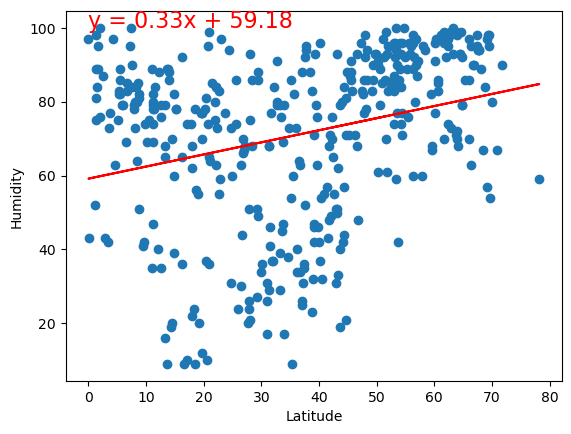

In [18]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat', 'Humidity','Latitude', 'Humidity')

The rvalue is: 0.13227743617520854


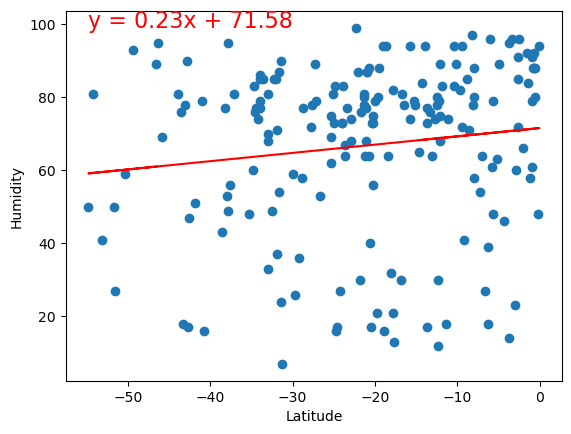

In [19]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Humidity','Latitude','Humidity')

**Discussion about the linear relationship:** The regression and data indicate that the closer you get to the north pole, the more humid it gets, which is something I was not expecting to see. A quick search revealed that the lower humidity in the southern hemisphere being due to the fact that the south pole is directly over a continent, while the north pole is located in the middle of an ocean. Which on a humerous note means that Santa and his workshop would have to be located on one of the following, floating on a barge, floating in an air ship, in a habitat on the oceaen floor, or in another dimension where the north pole is a solid piece of terra firma, or whatever they call it in that dimension.

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.06531115538422061


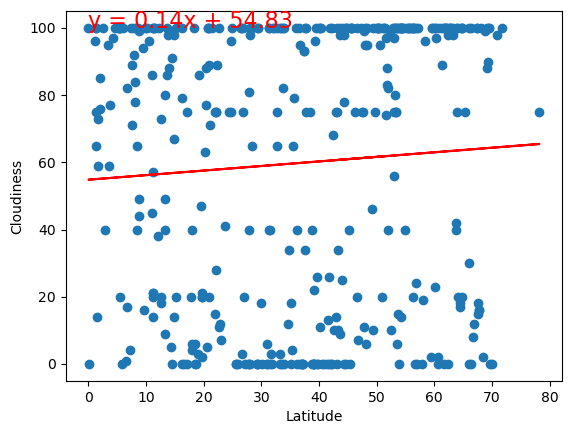

In [20]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat','Cloudiness','Latitude', 'Cloudiness')

The rvalue is: 0.09414519997511464


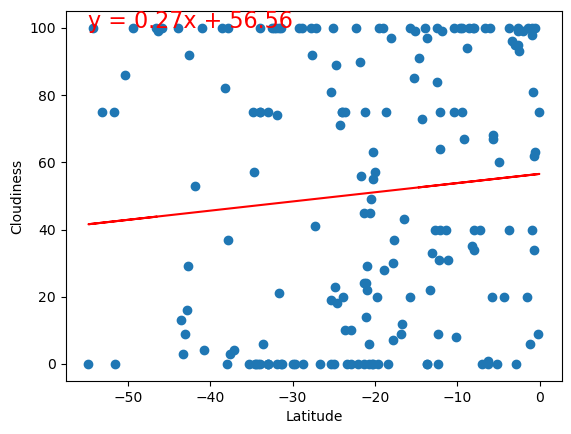

In [21]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Cloudiness','Latitude', 'Cloudiness')

**Discussion about the linear relationship:** The cloudiness follows the same trend as humidity, which would go hand in hand with their being more water in the air.

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: 0.06580957507356414


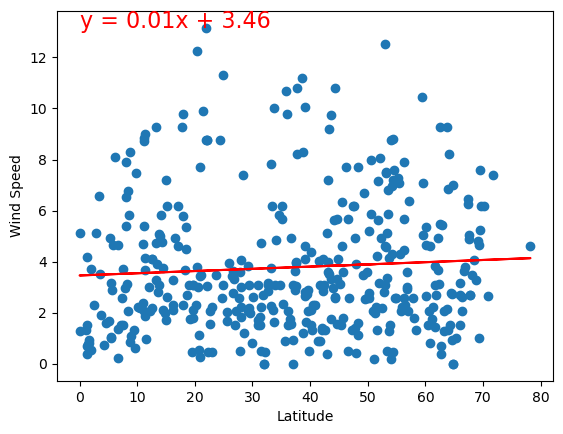

In [22]:
# Northern Hemisphere
Regress_scat_Plot(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

The rvalue is: -0.28380615080225075


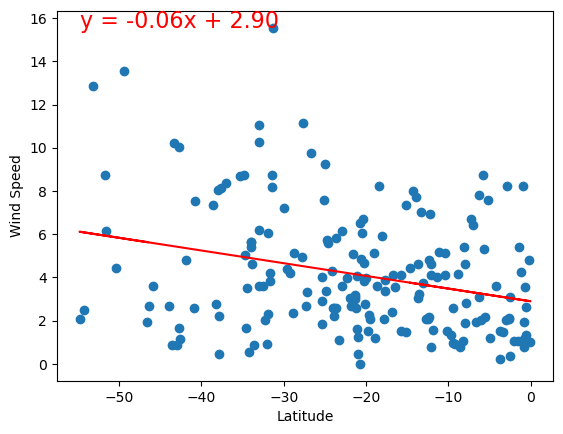

In [23]:
# Southern Hemisphere
Regress_scat_Plot(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed')

**Discussion about the linear relationship:** Wind speed in the southern hemisphere decreases the closer it gets to the equator, and stays relatively low in the northern hemisphere. I was not expecting this either, but given what I learned in high school, the previous plots, and the internet, it would be due to the Coriolis effect. The greater wind speed in the southern hemisphere being due to the giant icy continent of Antartica, and the lack of ice at the north pole. 